# AS07 Collocation for finding enthusiastic commentors

在文字探勘的第二單元我們介紹了Collocation來找出significant word pair。同樣的方法，我也可以把他改造來找出，在討論板上哪兩個人老是一起出現。你可以想像說在一個討論板中，某一主題一出來，某些人就會突然冒出來開始Comment。並且A下了Comment後，很快的B也會跟著下Comment。我們可以用Collocation的概念來找出這些總是一起出現的Commentors。但社會科學會把這樣的關係稱為Cooccurrence（共現）。

## Loading data

In [1]:
# colab
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

--2021-12-05 12:16:48--  https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat [following]
--2021-12-05 12:16:48--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992132 (969K) [application/octet-stream]
Saving to: ‘pttpost_20210509_n178.dat’

pttpost_20210509_n1 100%[===================>] 968.88K  --.-KB/s    in 0.05s   

2021-12-05 12:16:49 (17.8 MB/s) - ‘pttpost_20210509_n178.dat’ saved [992132/99213

In [162]:
print(len(all_post))
print(all_post[0])
print("-"*80)
for comment in all_post[5]['comments']:
    print(comment)

178
{'author': 's72005ming (QQ)', 'authorid': 's72005ming', 'nickname': 'QQ', 'link': 'https://www.ptt.cc/bbs/Gossiping/M.1620528765.A.DBD.html', 'title': '[問卦] 美國會研究因武漢肺炎死亡的人種嗎？', 'timestamp': 'Sun May  9 10:52:43 2021', 'content': '美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\n以美國這麼重視人權和觀感的國家\n\n會有研究因武漢肺炎死亡人種的論文嗎？\n\n\n好奇如果有哪一個人種死亡數最少\n\n我猜是華裔就是了！\n\n聽說疫情發生後一堆華裔老人連出門剪頭髮都不敢！--', 'comments': [{'tag': '推 ', 'userid': 'shiriri', 'content': ': 有很多了 黑人跟拉丁裔比較高 亞裔跟白人差不多', 'timestamp': ' 05/09 10:59\n'}, {'tag': '→ ', 'userid': 'HELLDIVER', 'content': ': 有趣的是 剛開始大爆發時 還說亞洲人比較會得武漢病毒', 'timestamp': ' 05/09 11:01\n'}, {'tag': '噓 ', 'userid': 'redsa12', 'content': ': 網路即時數據就都有按人種按年齡區分的數據了...', 'timestamp': ' 05/09 11:06\n'}, {'tag': '→ ', 'userid': 'redsa12', 'content': ': 問之前先估狗好嗎 加油好嗎', 'timestamp': ' 05/09 11:06\n'}]}
--------------------------------------------------------------------------------
{'tag': '推 ', 'userid': 'bignoob', 'content': ': 邊抱怨邊打啊 台灣人的不都這樣', 'timestamp': ' 05/08 14:32\n'}

## 1. Collocation as Cooccurrence
只要在同一則貼文的comments內，我們把任兩個commentor視為有co-comment，也就是Cooccurrence（共現）的關係。請計算出共現於本資料集中，頻率最高的前20對commentor（必須印出Collocation times作為參考）。
```
s72005ming 	 sl11pman 	 450
loham 	 sl11pman 	 450
sl11pman 	 s72005ming 	 450
sl11pman 	 loham 	 450
cwh0105 	 sl11pman 	 360
sl11pman 	 cwh0105 	 360
iampig951753 	 Runna 	 308
Runna 	 iampig951753 	 308
frank355571 	 sl11pman 	 270
sl11pman 	 frank355571 	 270
NICEGOGO 	 sl11pman 	 180
sl11pman 	 NICEGOGO 	 180
sl11pman 	 dawson0130 	 180
sl11pman 	 userlance 	 180
sl11pman 	 carryton 	 180
sl11pman 	 CheshireS 	 180
sl11pman 	 vic4580849 	 180
sl11pman 	 justeit 	 180
dawson0130 	 sl11pman 	 180
userlance 	 sl11pman 	 180
carryton 	 sl11pman 	 180
CheshireS 	 sl11pman 	 180
vic4580849 	 sl11pman 	 180
justeit 	 sl11pman 	 180
psl7634 	 gustavek 	 136
gustavek 	 psl7634 	 136
```

In [163]:
all_commentor = []

for i in all_post:
  post_commentor = []
  for id in i['comments']:
    #print(id['userid'])
    post_commentor.append(id['userid'])
  #print(post_commentor)
  all_commentor.append(post_commentor)

print(len(all_commentor))
print(all_commentor[5])

178
['bignoob', 'ethan0419', 'geesegeese', 's3z15a3z15a', 'ckvir', 'clv', 'clv', 'Dia149', 'Dia149', 'radi035', 'radi035']


In [164]:
from collections import Counter
id_pair_counts = Counter()


for id in all_commentor:
  if len(id) > 1:
    for i in range(len(id)):
      for distance in range(-len(id)+1,len(id)):
        if i + distance < len(id) and i + distance >= 0:
            w1 = id[i]
            w2 = id[i + distance]
            if w1 != w2 :
              id_pair_counts[(w1, w2)] += 1
        
for (w1, w2), c in id_pair_counts.most_common(20):
    print("%s\t%s\t%d" %(w1,w2,c))


s72005ming	sl11pman	450
loham	sl11pman	450
sl11pman	s72005ming	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	308
Runna	iampig951753	308
frank355571	sl11pman	270
sl11pman	frank355571	270
NICEGOGO	sl11pman	180
sl11pman	NICEGOGO	180
sl11pman	dawson0130	180
sl11pman	userlance	180
sl11pman	carryton	180
sl11pman	CheshireS	180
sl11pman	vic4580849	180
sl11pman	justeit	180
dawson0130	sl11pman	180
userlance	sl11pman	180


## 2. Using MI
MI的計算方式主要是為了要標準化任一字的出現次數和任兩個字的出現次數的影響。請用MI的方式計算出哪兩個人特別常一起出現在同一則貼文的comments中。請用`most_common()`印出M前20大MI的Pairs（必須印出MI值作為參考）。

In [165]:
import math
def mutual_information(w1_w2_prob, w1_prob, w2_prob):
    return math.log2(w1_w2_prob / (w1_prob * w2_prob))

In [166]:
pair_mutual_information_scores = Counter()
for id in all_commentor:
  if len(id) > 1:
    id_pair = Counter()
    for i in range(len(id)):
      for distance in range(-len(id)+1, len(id)):
        if i + distance < len(id) and i + distance >= 0:
            w1 = id[i]
            w2 = id[i + distance]
            if w1 != w2:
              id_pair[(w1, w2)] += 1
              num_bigrams += 1
    num_bigrams = sum(id_pair.values())
    id_count = Counter(id)
    for (w1, w2), c in id_pair.most_common():
      if c>1:
        p12 = c/num_bigrams
        p1 = id_count[w1]/len(id)
        p2 = id_count[w2]/len(id)
        pair_mutual_information_scores[(w1, w2, c)] = mutual_information(p12, p1, p2)
        #print(w1, w2, c, num_bigrams, pair_mutual_information_scores[(w1, w2, c)])

In [167]:
for (w1, w2, c), mi in pair_mutual_information_scores.most_common():
  if c >= 180:
    print("%s\t%s\t%d\t%f" %(w1,w2,c,mi))

s72005ming	sl11pman	450	0.560543
loham	sl11pman	450	0.560543
sl11pman	s72005ming	450	0.560543
sl11pman	loham	450	0.560543
cwh0105	sl11pman	360	0.560543
sl11pman	cwh0105	360	0.560543
frank355571	sl11pman	270	0.560543
sl11pman	frank355571	270	0.560543
NICEGOGO	sl11pman	180	0.560543
sl11pman	NICEGOGO	180	0.560543
sl11pman	dawson0130	180	0.560543
sl11pman	userlance	180	0.560543
sl11pman	carryton	180	0.560543
sl11pman	CheshireS	180	0.560543
sl11pman	vic4580849	180	0.560543
sl11pman	justeit	180	0.560543
dawson0130	sl11pman	180	0.560543
userlance	sl11pman	180	0.560543
carryton	sl11pman	180	0.560543
CheshireS	sl11pman	180	0.560543
vic4580849	sl11pman	180	0.560543
justeit	sl11pman	180	0.560543
iampig951753	Runna	308	0.451549
Runna	iampig951753	308	0.451549


## 3. Cooccurrence with distance
就上述的資料集，我想定義的人與人的關係是「這兩個人老是一前一後出現」，所以我規劃僅計算前後5則以內的comments，也就是說，在同一貼文中，如果A是第一則comment，B是第六則comment，C是第七則，那我不列計A和C的關係，但列計A和B的關係。請用collocation with distance的觀念，計算任兩個comment間的平均距離，並用`most_comment()`列印出平均距離最短的前二十對commentors。

In [168]:
id_pair_counts = Counter()
id_pair_distance_counts = Counter()

for id in all_commentor:
  if len(id) > 1:
    for i in range(len(id)):
      for distance in range(1, 5):
        if i + distance < len(id) and i + distance >= 0:
            w1 = id[i]
            w2 = id[i + distance]
            if w1 != w2 :
              id_pair_counts[(w1, w2)] += 1
              id_pair_distance_counts[(w1, w2, distance)] += 1

In [169]:
pair_mean_distances = Counter()

for (w1, w2, d), c in id_pair_distance_counts.most_common():
  if id_pair_counts[(w1, w2)] > 1:
    pair_mean_distances[(w1, w2)] += d * (c / id_pair_counts[(w1, w2)])
   
     
for (w1, w2), distance in pair_mean_distances.most_common()[-20:]:
    print("%s-%s\t%f\t%d" % (w1, w2, distance, id_pair_counts[(w1, w2)]))


chen0625-Qinsect	1.500000	2
kenryu-bar1005	1.500000	2
bar1005-jetalpha	1.500000	2
typeklng-GARRETH	1.500000	2
GARRETH-fenix220	1.500000	2
KaiManSo-nikewang	1.500000	2
gwenwoo-s359999	1.500000	2
a410046-apatosaurus	1.500000	2
apatosaurus-t934140225	1.500000	2
username1-TsmcEE	1.500000	2
bigwun73-yheb88	1.500000	2
l88-sali921	1.500000	2
ab4daa-cecille	1.500000	2
kingstongyu-ntlutw	1.500000	2
ntlutw-kid1a2b3c4d	1.500000	2
kuan12065-lazarus1121	1.500000	2
show282-kuosambition	1.000000	2
Yonhao-jump693	1.000000	2
sellgd-smalltwo	1.000000	2
lazarus1121-tenka92417	1.000000	2


## 4. Drawing collocation network
以下已經提供給你部分不同網絡的視覺化方法和參數調整方法。如果你要看懂每個函式有可能要查閱Networkx的Document，不過這是為了push你去查閱document來理解這些程式碼。

列印出mi值或count值前500大、前1000大、前2000大（會有點吃力）的pairs of user，並觀察該圖型。基於co-commentor的網絡視覺化，你認為這群co-commenter有什麼特性？請多列印幾種版本，並將你的看法寫在以下的ANSWER後：
### ANSWER:
透過pyvis.network分別印出mi前500、前1000與前2000的圖片，圖片由數個大大小小的網絡組成，每個網絡可視為一群一群co-commenter，我認為每個網絡可大致代表單篇貼文的留言者。活躍度較高、關聯性特別高的幾個commenter會位於網絡的中心點，延伸其他節點與邊線，所以我們從網絡密集程度來觀察，會發現越接近網絡中心的帳號留言數越多，co-commenter的pair出現次數也更高。

前500只有一個特別密集的網絡與7個較小的網絡，而且彼此無連結，在最密集網絡的中心區域有：frank355571, loham, s72005ming, sl11pman。前1000也是有一個特別密集的區域，中心區除了上述帳號還多了：cwh0105, dawson0130, userlance等等，都是前面pair出現次數前幾名的帳號。若印出前2000大的的mi值可發現某些大小網絡之間存在連結，代表有一些帳號同時出現在不同篇貼文，而且留言活躍高，但過於密集會降低圖片的可讀性，所以最密集的那群反而難以解讀與尋找關聯，但對於其他較小或叫疏鬆的網絡就可幫助我們找到更多關聯。

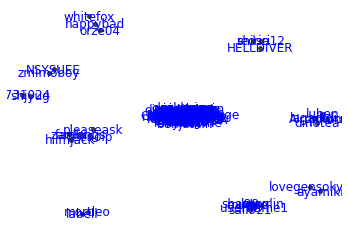

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
li = [(w1, w2, id_pair_counts[(w1, w2)], mi) for (w1, w2, c), mi in pair_mutual_information_scores.most_common()]
df = pd.DataFrame.from_records(li, columns =['w1', 'w2', 'count', 'mi'])

G = nx.from_pandas_edgelist(df[:1000],
                            source = 'w1',
                            target = 'w2')
widths = nx.get_edge_attributes(G, 'mi')
nodelist = G.nodes()

# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)
pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([w/2 for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

## 也可使用pyvis.network畫畫看

In [146]:
pip install pyvis

In [161]:
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

## 4. Thinking
這樣的做法是否有助於察覺特定網軍的協同合作？

是，我們可透過co-commenter網絡視覺化觀察帳號間的關聯性，若某帳號位於網絡的核心，或是與多個群集有連結關係，該帳號就有可能是網軍，表示它在相關主題的多篇貼文都會留言，若有前後出現的關係，也可隨著圖像顯示抓出其他合作的帳號。除了mi值也能使用chi-square或count-based的方式印出網絡圖，找出commenter彼此的關聯。